The Iris dataset contains measurements of 150 iris flowers from three different species: setosa, versicolor, and
viriginica. These measurements include the length and width of the petals, and the length and width of
the sepals, all measured in centimeters.

Our goal is to build a machine learning model that can learn the measurements of these iris flowers,
whose species are known, so that we can predict the species for a new iris flower.

## Logistic Regression in OpenCV 

In [1]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
iris = datasets.load_iris()

This function returns a dictionary we call iris, which contains a bunch of different fields:

* DESCR: Get a description of the data
* data: The actual data, < num_samples x num_features >
* feature_names: The names of the features
* target: The class labels, < num_samples x 1 >
* target_names: The names of the class labels



In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

Here are 150 data points, each of which have four feature values:

In [5]:
iris.data.shape

(150, 4)

These four features correspond to the sepal and petal dimensions based on centimeter:

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The target of data set

In [7]:
iris.target.shape

(150,)

Find out the levels of the target class

In [8]:
np.unique(iris.target)

array([0, 1, 2])

## Binary Classification

For the sake of simplicity, we want to focus on a binary classification problem for now, where we only have two classes. The easiest way to do this is to discard all data points belonging to a certain class, such as class label 2, by selecting all the rows that do not belong to class 2:

In [9]:
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

#  Data Visualization

Using Matplotlib, we create a scatter plot where the color of each data point corresponds to the class label.

To make plotting easier, we limit ourselves to the first two features (iris.feature_names[0] being the sepal length and iris.feature_names[1] being the sepal width). We can see a nice separation of classes in the following figure:

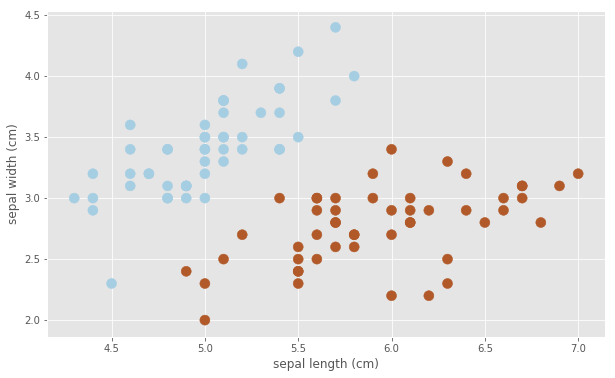

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## Splitting the data into training and test sets

* split the data into 90 percent training data and 10 percent test data, which we specify with test_size=0.1.

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.1, random_state=42)

In [13]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [14]:
X_test.shape, y_test.shape

((10, 4), (10,))

## Training the classifier 

Creating a logistic regression classifier involves pretty much the same steps as setting up $k$-NN:

In [15]:
lr = cv2.ml.LogisticRegression_create()

We then have to specify the desired training method. Here, we can choose cv2.ml.LogisticRegression_BATCH or cv2.ml.LogisticRegression_MINI_BATCH. For now, all we need to know is that we want to update the model after every data point, which can be achieved with the following code:

In [16]:
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)

We also want to specify the number of iterations the algorithm should run before it terminates:

In [18]:
lr.setIterations(100)

We can then call the train method of the object, which will return True upon success:

In [19]:
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train);

Retrieve the learned weights:

In [20]:
lr.get_learnt_thetas()

array([[-0.04109114, -0.01968078, -0.16216496,  0.28704911,  0.11945519]], dtype=float32)

## Testing the classifier

Calculating the accuracy score on the training set:

In [21]:
ret, y_pred = lr.predict(X_train)

In [22]:
metrics.accuracy_score(y_train, y_pred)

1.0

Check on the test dataset

In [23]:
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

Luckily, we get another perfect score! Now we can be sure that the model is working greatly.